<a href="https://colab.research.google.com/github/ZeusKane/serigne-kane/blob/serigne-kane/Exercice_2_corrige.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1-1141133293.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1-1141133293.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179

Accuracy: 0.7989


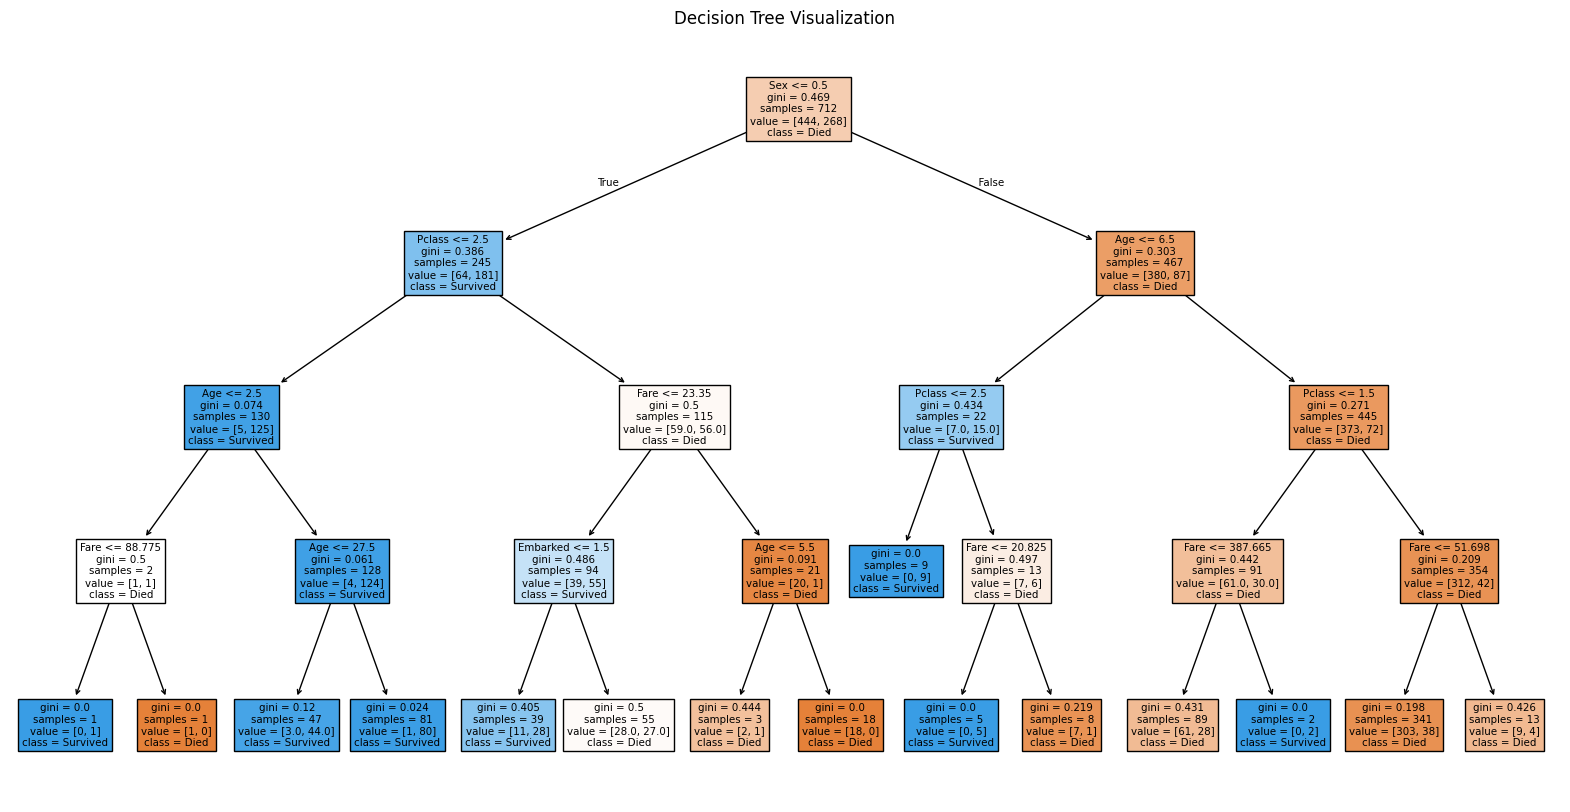


Hard Voting Classifier Results:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.82      0.66      0.73        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.79       179

Accuracy: 0.7989

Random Forest Results:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Accuracy: 0.7877


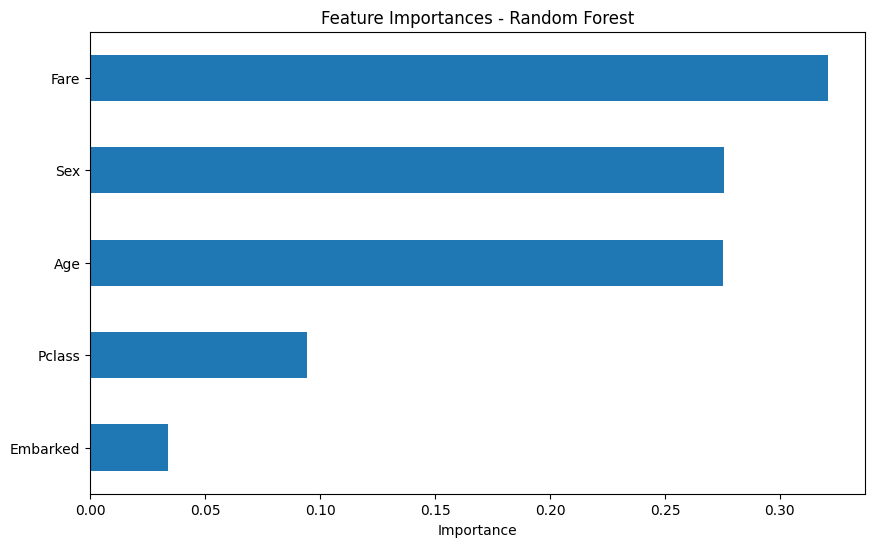


EXERCISE 1: Different Decision Tree Depths
Max depth 2: Accuracy = 0.7654
Max depth 4: Accuracy = 0.7989
Max depth 6: Accuracy = 0.8045
Max depth 10: Accuracy = 0.7989

Best depth: 6 with accuracy: 0.8045


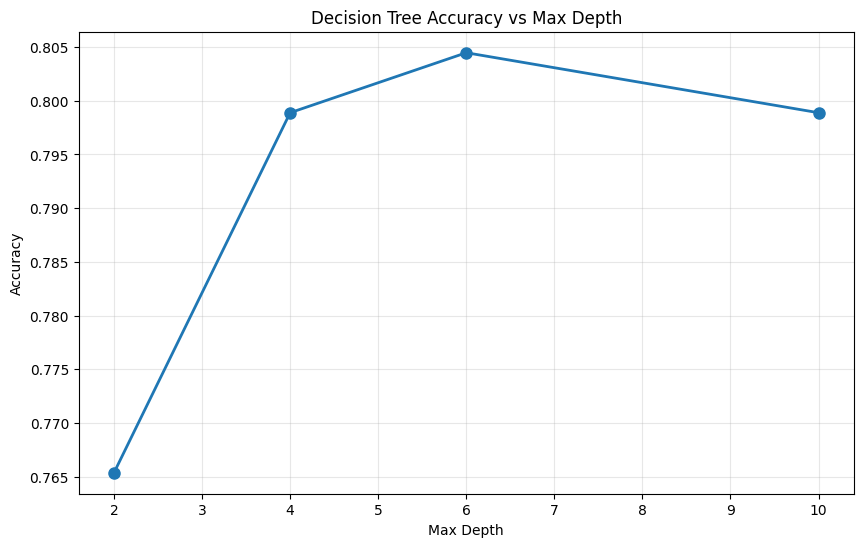


EXERCISE 2: Soft Voting vs Hard Voting
Soft Voting Classifier Results:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Soft Voting Accuracy: 0.8156
Hard Voting Accuracy: 0.7989

Comparison:
        Method  Accuracy
0  Hard Voting  0.798883
1  Soft Voting  0.815642

EXERCISE 3: Random Forest Hyperparameter Tuning
Starting GridSearchCV... This may take a few minutes.
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best parameters: {'max_depth': 6, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validation score: 0.8399
Test accuracy with best parameters: 0.8045

Best Random Forest Results:
              precision    recall  f1-score   support

           0       0.80      0.90      0.84     

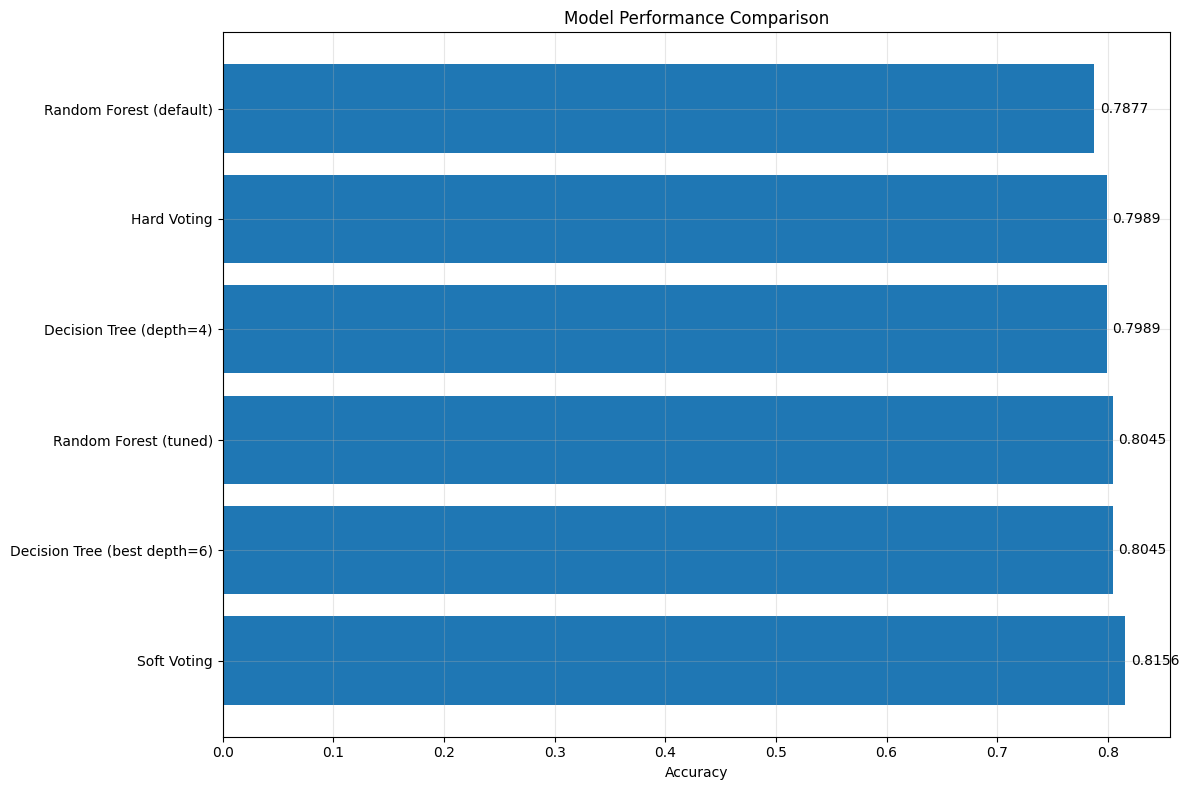


Analysis complete!


In [1]:
# Decision Trees and Ensemble Learning
# This notebook covers:
# * Decision Tree Training
# * Visualization of a Decision Tree
# * Voting Classifier
# * Bagging and Boosting
# * Random Forests
# Dataset: Titanic (classification task)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Data preprocessing
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and Visualize a Decision Tree
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Decision Tree Results:")
print(classification_report(y_test, y_pred_tree))
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.4f}")

plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=features, class_names=['Died', 'Survived'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Hard Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=1000)),
    ('svc', SVC(probability=True)),
    ('dt', DecisionTreeClassifier())
], voting='hard')

voting_clf.fit(X_train, y_train)
y_pred_vote = voting_clf.predict(X_test)
print("\nHard Voting Classifier Results:")
print(classification_report(y_test, y_pred_vote))
print(f"Accuracy: {accuracy_score(y_test, y_pred_vote):.4f}")

# Random Forest
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_forest))
print(f"Accuracy: {accuracy_score(y_test, y_pred_forest):.4f}")

# Feature importance plot
importances = pd.Series(forest.feature_importances_, index=features)
plt.figure(figsize=(10, 6))
importances.sort_values().plot(kind='barh')
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.show()

# EXERCISES

# 1. Try Different Depths for the Decision Tree
print("\n" + "="*50)
print("EXERCISE 1: Different Decision Tree Depths")
print("="*50)

depths = [2, 4, 6, 10]
results = {}

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[depth] = accuracy
    print(f"Max depth {depth}: Accuracy = {accuracy:.4f}")

# Find best depth
best_depth = max(results, key=results.get)
print(f"\nBest depth: {best_depth} with accuracy: {results[best_depth]:.4f}")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(depths, [results[d] for d in depths], marker='o', linewidth=2, markersize=8)
plt.title("Decision Tree Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.grid(True, alpha=0.3)
plt.show()

# 2. Try Soft Voting Instead of Hard Voting
print("\n" + "="*50)
print("EXERCISE 2: Soft Voting vs Hard Voting")
print("="*50)

# Soft Voting Classifier
voting_soft = VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=1000)),
    ('svc', SVC(probability=True)),
    ('dt', DecisionTreeClassifier())
], voting='soft')

voting_soft.fit(X_train, y_train)
y_pred_soft = voting_soft.predict(X_test)

print("Soft Voting Classifier Results:")
print(classification_report(y_test, y_pred_soft))
print(f"Soft Voting Accuracy: {accuracy_score(y_test, y_pred_soft):.4f}")
print(f"Hard Voting Accuracy: {accuracy_score(y_test, y_pred_vote):.4f}")

# Compare the two
comparison = pd.DataFrame({
    'Method': ['Hard Voting', 'Soft Voting'],
    'Accuracy': [accuracy_score(y_test, y_pred_vote), accuracy_score(y_test, y_pred_soft)]
})
print(f"\nComparison:")
print(comparison)

# 3. Tune the Random Forest with GridSearchCV
print("\n" + "="*50)
print("EXERCISE 3: Random Forest Hyperparameter Tuning")
print("="*50)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10]
}

print("Starting GridSearchCV... This may take a few minutes.")
grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print(f"\nBest parameters: {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_:.4f}")

# Test the best model
best_rf = grid.best_estimator_
y_pred_best = best_rf.predict(X_test)
print(f"Test accuracy with best parameters: {accuracy_score(y_test, y_pred_best):.4f}")

print("\nBest Random Forest Results:")
print(classification_report(y_test, y_pred_best))

# Compare all models
print("\n" + "="*50)
print("FINAL COMPARISON OF ALL MODELS")
print("="*50)

models_comparison = pd.DataFrame({
    'Model': [
        'Decision Tree (depth=4)',
        f'Decision Tree (best depth={best_depth})',
        'Hard Voting',
        'Soft Voting',
        'Random Forest (default)',
        'Random Forest (tuned)'
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred_tree),
        results[best_depth],
        accuracy_score(y_test, y_pred_vote),
        accuracy_score(y_test, y_pred_soft),
        accuracy_score(y_test, y_pred_forest),
        accuracy_score(y_test, y_pred_best)
    ]
})

models_comparison = models_comparison.sort_values('Accuracy', ascending=False)
print(models_comparison)

# Visualization of model comparison
plt.figure(figsize=(12, 8))
plt.barh(models_comparison['Model'], models_comparison['Accuracy'])
plt.xlabel('Accuracy')
plt.title('Model Performance Comparison')
plt.grid(True, alpha=0.3)
for i, v in enumerate(models_comparison['Accuracy']):
    plt.text(v + 0.005, i, f'{v:.4f}', va='center')
plt.tight_layout()
plt.show()

print("\nAnalysis complete!")